<a href="https://colab.research.google.com/github/TriDuks/AI/blob/main/Week8_Crabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sas 
import numpy as np
import pandas as pd


In [44]:
data = pd.read_csv('crabs.csv')
data.head()

,speies,sex,index,fontallip,rearwidth,length,width,depth
0,B,M,1,8.1,6.7,16.1,19.0,7.0
1,B,M,2,8.8,7.7,18.1,20.8,7.4
2,B,M,3,9.2,7.8,19.0,22.4,7.7
3,B,M,4,9.6,7.9,20.1,23.1,8.2
4,B,M,5,9.8,8.0,20.3,23.0,8.2


In [83]:
data =data.set_index(data['speies'])
data = data.loc['B']
data


,speies,sex,index,fontallip,rearwidth,length,width,depth
speies,,,,,,,,
B,B,M,1,8.1,6.7,16.1,19.0,7.0
B,B,M,2,8.8,7.7,18.1,20.8,7.4
B,B,M,3,9.2,7.8,19.0,22.4,7.7
B,B,M,4,9.6,7.9,20.1,23.1,8.2
B,B,M,5,9.8,8.0,20.3,23.0,8.2
...,...,...,...,...,...,...,...,...
B,B,F,46,16.4,14.0,34.2,39.8,15.2
B,B,F,47,16.7,16.1,36.6,41.9,15.4
B,B,F,48,17.4,16.9,38.2,44.1,16.6


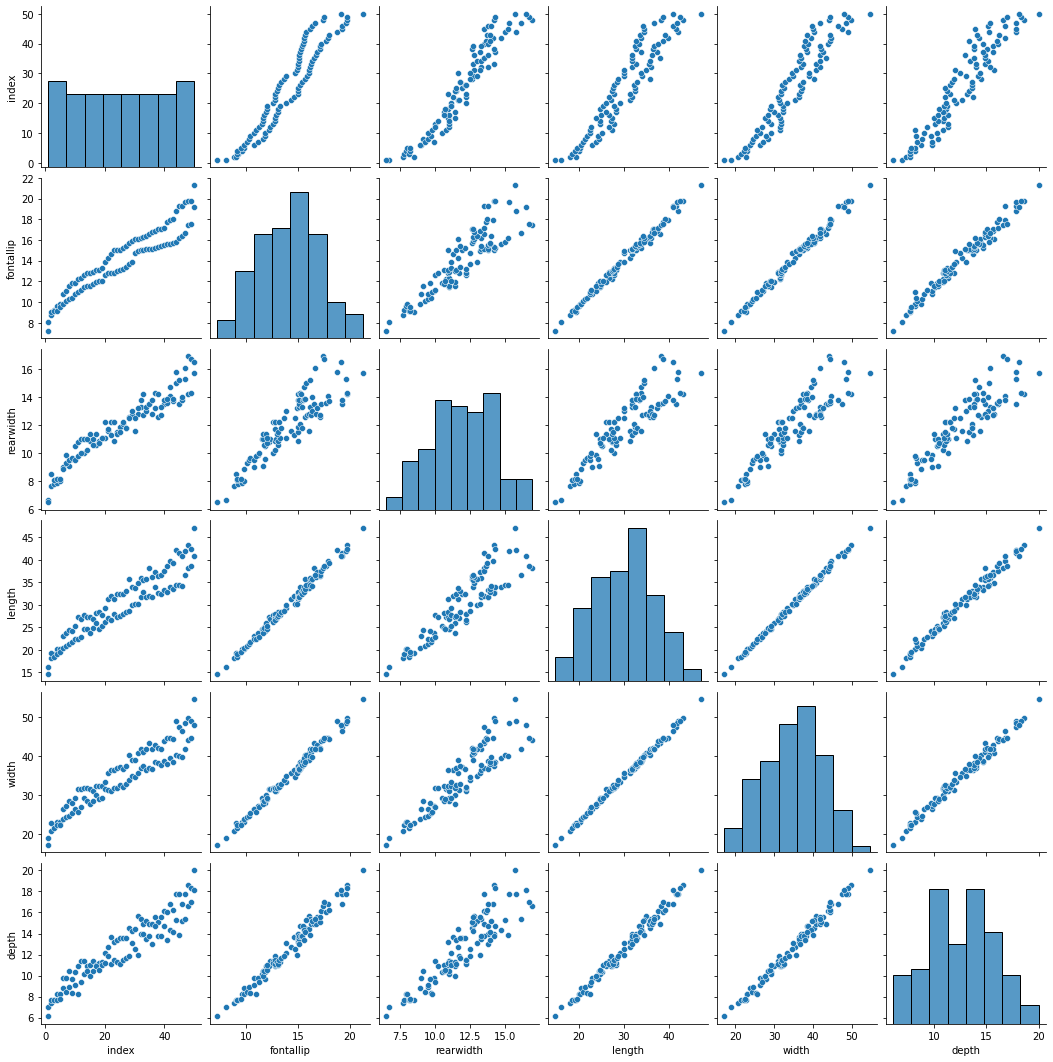

In [14]:
sas.pairplot(data)

<Axes: >

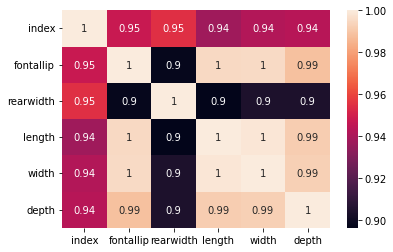

In [15]:
#Biểu đồ nhiệt thể hiện thay thế cho ma trận correlation
corr = data.corr()
sas.heatmap(corr,annot = True)

In [85]:
dataframe = pd.read_csv('crabs.csv')
data.head()
crab_B = dataframe[dataframe['speies']=='B']
#print(crab_B)
crab_B.sex = crab_B.sex.apply(lambda x: x.replace("M","0"))
crab_B.sex = crab_B.sex.apply(lambda x: x.replace("F","1"))
print(crab_B)

   speies sex  index  fontallip  rearwidth  length  width  depth
0       B   0      1        8.1        6.7    16.1   19.0    7.0
1       B   0      2        8.8        7.7    18.1   20.8    7.4
2       B   0      3        9.2        7.8    19.0   22.4    7.7
3       B   0      4        9.6        7.9    20.1   23.1    8.2
4       B   0      5        9.8        8.0    20.3   23.0    8.2
..    ...  ..    ...        ...        ...     ...    ...    ...
95      B   1     46       16.4       14.0    34.2   39.8   15.2
96      B   1     47       16.7       16.1    36.6   41.9   15.4
97      B   1     48       17.4       16.9    38.2   44.1   16.6
98      B   1     49       17.5       16.7    38.6   44.5   17.0
99      B   1     50       19.2       16.5    40.9   47.9   18.1

[100 rows x 8 columns]


<ipython-input-85-9822d20a7259>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crab_B.sex = crab_B.sex.apply(lambda x: x.replace("M","0"))
<ipython-input-85-9822d20a7259>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crab_B.sex = crab_B.sex.apply(lambda x: x.replace("F","1"))


In [87]:
x = crab_B.drop(['speies','sex','index'],axis = 1)
print(x)
y = crab_B.sex

    fontallip  rearwidth  length  width  depth
0         8.1        6.7    16.1   19.0    7.0
1         8.8        7.7    18.1   20.8    7.4
2         9.2        7.8    19.0   22.4    7.7
3         9.6        7.9    20.1   23.1    8.2
4         9.8        8.0    20.3   23.0    8.2
..        ...        ...     ...    ...    ...
95       16.4       14.0    34.2   39.8   15.2
96       16.7       16.1    36.6   41.9   15.4
97       17.4       16.9    38.2   44.1   16.6
98       17.5       16.7    38.6   44.5   17.0
99       19.2       16.5    40.9   47.9   18.1

[100 rows x 5 columns]


In [88]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [91]:
model = Perceptron(max_iter = 100, eta0 = 0.05, random_state = 0)
#model: số lần học
#eta: tốc độ học, có giá trị từ (0,1), tốc độ càng nhỏ càng chính xác*
model.fit(x_train_std, y_train)
y_pred = model.predict(x_test_std)
#print(y_pred)
#print(y_test)
print("Độ chính xác của mô hình: ", accuracy_score(y_test, y_pred))


Độ chính xác của mô hình:  0.8333333333333334


In [92]:
x_2 = [[9, 6, 16, 19, 8],[15, 2, 5, 8, 10]]
sc = StandardScaler()
sc.fit(x_2)
x_2_std = sc.transform(x_2)

In [93]:
y_2 = model.predict(x_2_std)
print(y_2)

['1' '0']
